# Part II - (Prosper Loan)
## by ( Aude Armelle Djofang)


## Investigation Overview


> In the exploratory phase, we found that Loan original amount and borrower APR are keys factors that affect a borrower . From these two information, we can have an idea about the other characteristic of the borrower.  We will deeper our the understanding on the loan original amount and borrower APR.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df=pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


### Distribution of Loan Original Amount of the borrower
>- the Original amount range from 1000 dollars to  35000 Dollars. This Original amount depend on the APR and Term of the loan
>- The most taken amount is less than 5000. 

In [3]:
#Let's define a drawing function to plot histogram 
def draw_hist(dataframe, column_name, titre='Loan Original amount range'):
    dataframe[column_name].plot(kind='hist')
    plt.title(titre)
    plt.legend()
plt.show()

Text(0, 0.5, 'Number of loans')

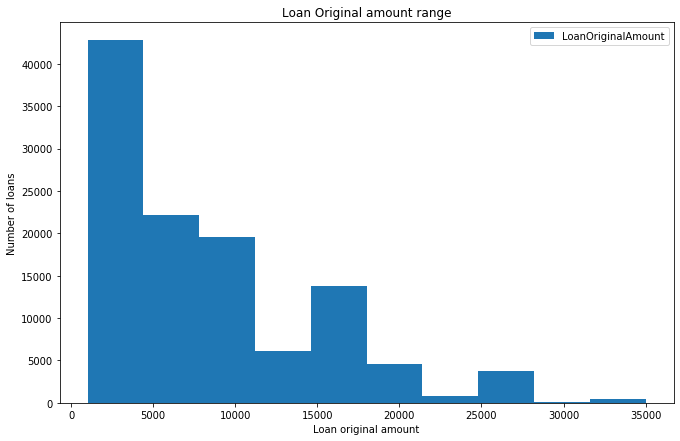

In [4]:
#defining the size of the figure
plt.figure(figsize=(11,7))
#Plotting of Original amount histogram 
draw_hist(df, 'LoanOriginalAmount', titre='Loan Original amount range')
#setting axis and plot titles
plt.xlabel("Loan original amount")
plt.ylabel("Number of loans")


### Distribution of Borrower APR
> The Majority of borrower use an APR of 20%. This value goes up to 50%. But very few people reach the value of 50%. 

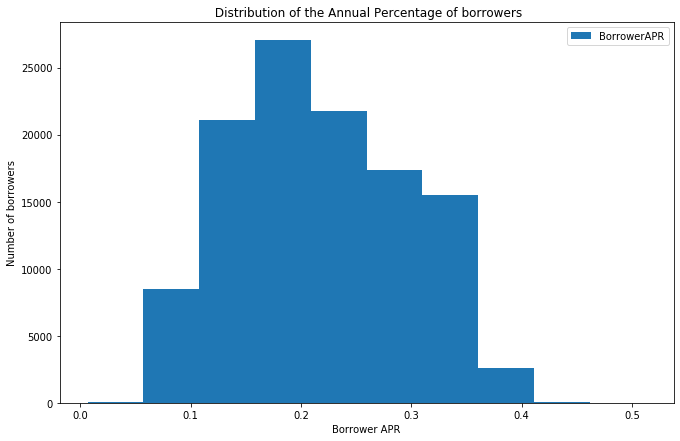

In [5]:
#Graphic representation of Annual Percentage Rate of borrowers
#defining the size of the figure
plt.figure(figsize=(11,7))
df['BorrowerAPR'].plot(kind='hist')
#setting title
plt.xlabel('Borrower APR') 
plt.ylabel('Number of borrowers')
plt.title(' Distribution of the Annual Percentage of borrowers')
plt.legend()

## Distribution of the borrower APR and Borrower Rate
> The Borrower APR increases with the Borrower Rate.

Text(0.5, 1.0, 'Relation between Borrower Rate and Borrower APR')

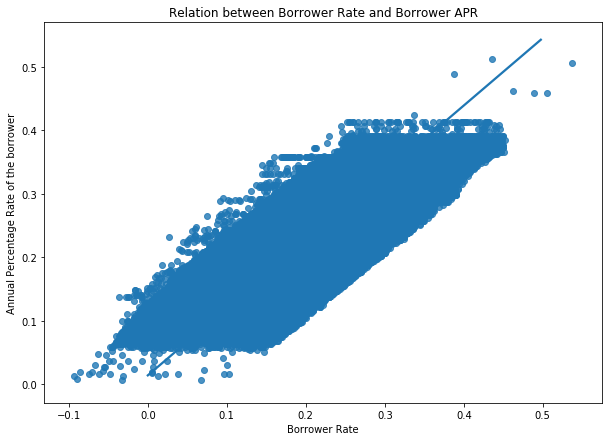

In [6]:
# Bivariate Plot
#plt.subplot(1, 2, 1) x_jitter=0.04, scatter_kws={'alpha':1/10}
plt.figure(figsize=(10,7))
sb.regplot(data = df, x = 'BorrowerRate', y = 'BorrowerAPR',x_jitter=0.1, fit_reg=True) 
plt.xlabel('Borrower Rate') 
plt.ylabel('Annual Percentage Rate of the borrower')
plt.title('Relation between Borrower Rate and Borrower APR')

## Relation between Borrower APR and Term of the loan
- 36 months term has the wider borrower APR and is the most used term as compare to the two other



No handles with labels found to put in legend.


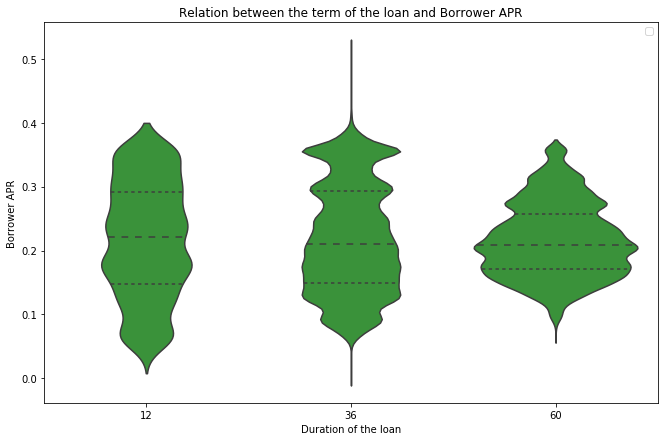

In [7]:
plt.figure(figsize = [11, 7])
color=sb.color_palette()[2]
sb.violinplot(data=df,x="Term",y="BorrowerAPR",color=color,inner="quartile")
# labels and title
plt.xlabel("Duration of the loan")
plt.ylabel("Borrower APR")
plt.title("Relation between the term of the loan and Borrower APR")
plt.legend()

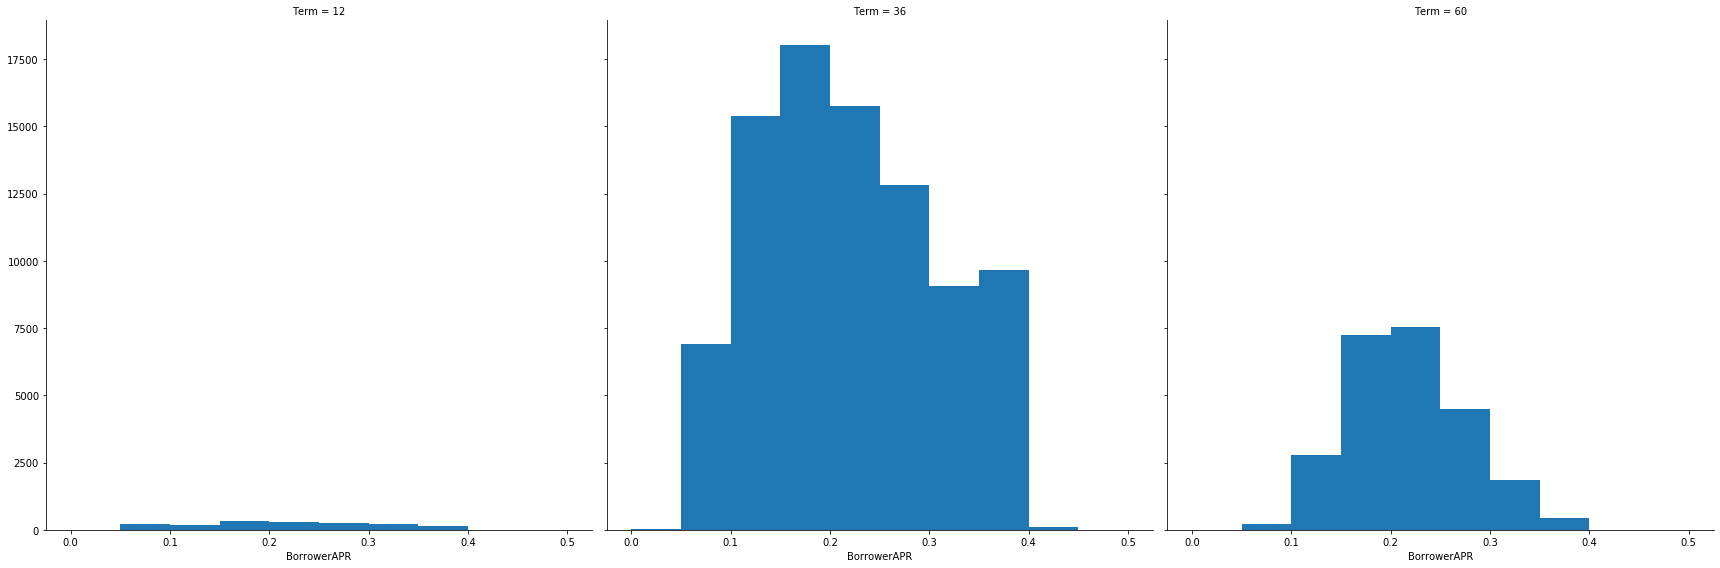

In [8]:
fg=sb.FacetGrid(data=df,col="Term",height=8)
binlim=np.arange(0,0.5+0.05,.05)
fg.map(plt.hist,"BorrowerAPR",bins=binlim)

### Relation between loan Original amount and loan category
- Loan for student use the lowest median and loan for Debt consolidation has the highest median. 
- This means that The smallest amount are taken for student use and the highest amount for debt consolidation. 
- This may implies that debt consolilation loans have less borrower rate than loan for student use. Therefore student pay more interest rate than an employee
- Borrower with loan for debt consolidation reduce systematically their Annual Percentage Rate

In [9]:

df['LoanReason']=''
df.loc[df['ListingCategory (numeric)']==0,'LoanReason']='Not available'
df.loc[df['ListingCategory (numeric)']==1,'LoanReason']='Debt consolidation'
df.loc[df['ListingCategory (numeric)']==2,'LoanReason']='Home Improvement'
df.loc[df['ListingCategory (numeric)']==3,'LoanReason']='Business'
df.loc[df['ListingCategory (numeric)']==4,'LoanReason']='Personal Loan'
df.loc[df['ListingCategory (numeric)']==5,'LoanReason']='Student Use'
df.loc[df['ListingCategory (numeric)']==6,'LoanReason']='Auto'
df.loc[df['ListingCategory (numeric)']==7,'LoanReason']='Others'
df.loc[df['ListingCategory (numeric)']==8,'LoanReason']='Baby & Adoption'
df.loc[df['ListingCategory (numeric)']==9,'LoanReason']='Boat'
df.loc[df['ListingCategory (numeric)']==10,'LoanReason']='Cosmetic procedure'
df.loc[df['ListingCategory (numeric)']==11,'LoanReason']='Engagement ring'
df.loc[df['ListingCategory (numeric)']==12,'LoanReason']='Green Loans'
df.loc[df['ListingCategory (numeric)']==13,'LoanReason']='Household Expenses'
df.loc[df['ListingCategory (numeric)']==14,'LoanReason']='Large Purchases'
df.loc[df['ListingCategory (numeric)']==15,'LoanReason']='medical/Dental'
df.loc[df['ListingCategory (numeric)']==16,'LoanReason']='Motorcycle'
df.loc[df['ListingCategory (numeric)']==17,'LoanReason']='RV'
df.loc[df['ListingCategory (numeric)']==18,'LoanReason']='Taxes'
df.loc[df['ListingCategory (numeric)']==19,'LoanReason']='Vacation'
df.loc[df['ListingCategory (numeric)']==20,'LoanReason']='Wedding Loans'


In [10]:
#Let's drop 'ListingCategory (numeric)' column
df.drop('ListingCategory (numeric)',axis=1, inplace=True)

Text(0.5, 1.0, 'Relation between loan Original amount and loan category')

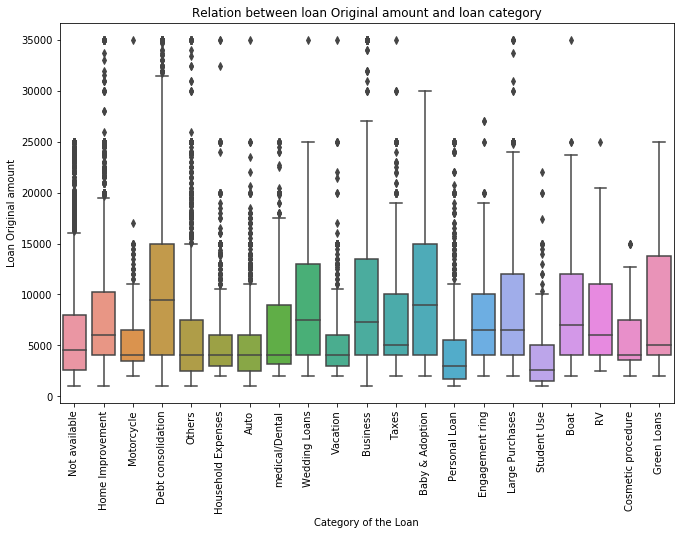

In [11]:
#Relation between Original amount and Category of the loan
plt.figure(figsize=(11,7))
sb.boxplot(data=df, x='LoanReason', y='LoanOriginalAmount')
plt.xlabel('Category of the Loan') 
plt.ylabel('Loan Original amount')
plt.xticks(rotation=90)
plt.title('Relation between loan Original amount and loan category')
#plt.legend()

## Relation between Income range and Term of loan

- Short term loan are only use for borrower with a considerable income range; Borrower with very low income can only access loan of 36 months term 
- The term of the loan depend on the original amount of a loan and the income range of the borrower. 
- A borrower with high income range can get very high loan with a various type of term



Text(0.5, 1.0, 'Relation between Income Range and Term of the loan')

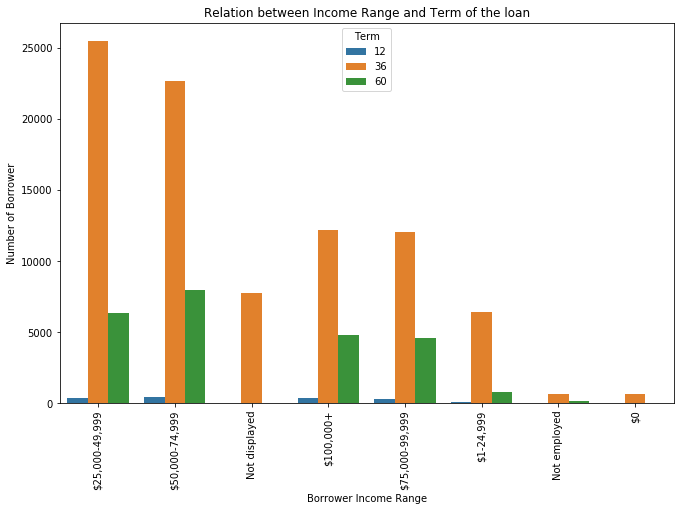

In [12]:
plt.figure(figsize=(11,7))
sb.countplot(data=df,x="IncomeRange",hue="Term")
plt.xticks(rotation=90)
plt.xlabel('Borrower Income Range') 
plt.ylabel('Number of Borrower')
plt.xticks(rotation=90)
plt.title('Relation between Income Range and Term of the loan')

##  Relation between the LoanOriginalAmount, BorrowerAPR and Term

- Original Amount less than 4000 Dollars with 36 months terms get the highest APR
- To get interest rate (<0.2), a borrower should ask for high original amount within 60 months term and have income range above 100 000 Dollars

Text(0.5, 1, 'Relation between Borrower APR, loan original amount and loan Term')

<Figure size 792x504 with 0 Axes>

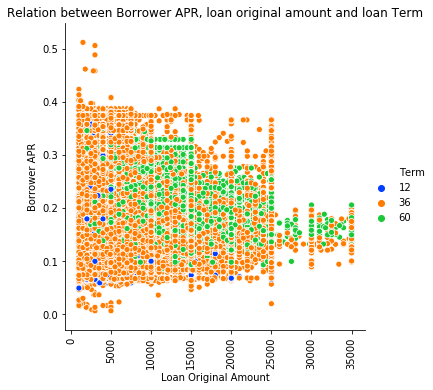

In [13]:
plt.figure(figsize=(11,7))
sb.relplot(kind='scatter', data=df, x='LoanOriginalAmount',y='BorrowerAPR',palette='bright', hue='Term')
plt.xticks(rotation=90)
# setting axing labels
plt.xlabel('Loan Original Amount')
plt.ylabel('Borrower APR')
plt.title('Relation between Borrower APR, loan original amount and loan Term')

Text(0.5, 1.0, 'Relation between loan original amount, Income Range and Term of the loan')

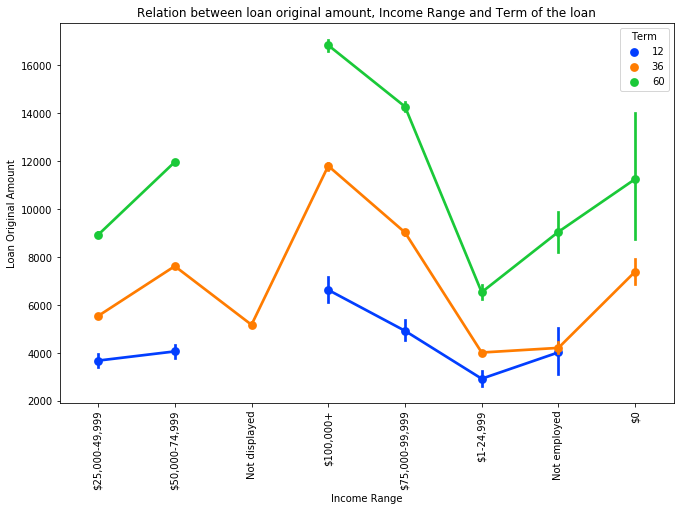

In [19]:
plt.figure(figsize=(11,7))
sb.pointplot(kind='scatter', data=df, y='LoanOriginalAmount',x='IncomeRange',palette='bright', hue='Term')
plt.xticks(rotation=90)
# setting axing labels
plt.xlabel('Income Range')
plt.ylabel('Loan Original Amount')
plt.title('Relation between loan original amount, Income Range and Term of the loan')

Text(0.5, 1, 'Relation between Borrower APR and loan original amount and employment status')

<Figure size 792x504 with 0 Axes>

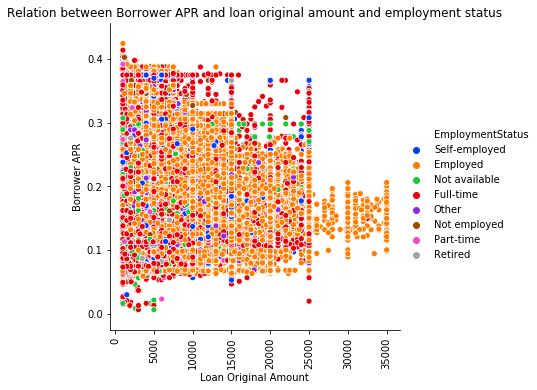

In [17]:
plt.figure(figsize=(11,7))
sb.relplot(kind='scatter', data=df, x='LoanOriginalAmount',y='BorrowerAPR',palette='bright', hue='EmploymentStatus')
plt.xticks(rotation=90)
# setting axing labels
plt.xlabel('Loan Original Amount')
plt.ylabel('Borrower APR')
plt.title('Relation between Borrower APR and loan original amount and employment status')

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [18]:
# Use this command if you are running this file in local
!jupyter nbconvert <Part_II_slideAude_Armelle>.ipynb --to slides --post serve --no-input --no-prompt

Le fichier spécifié est introuvable.


> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
